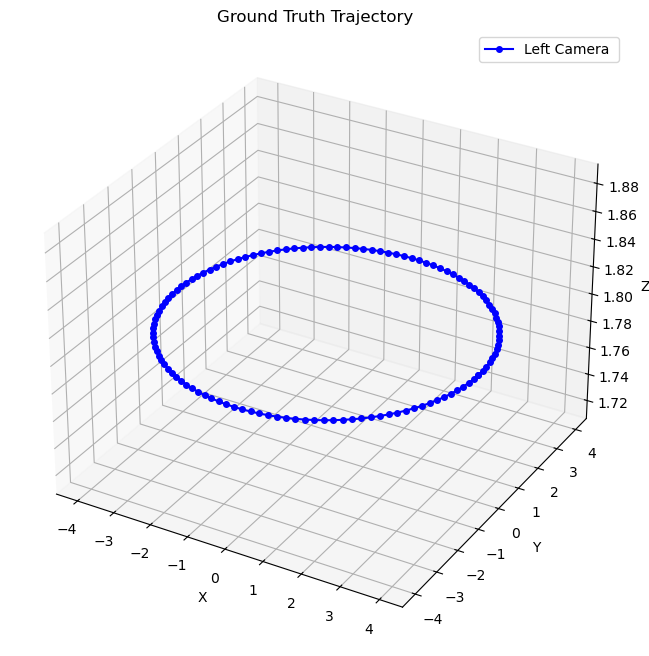

In [14]:
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2


with open('office_dataset_aruco/ground_truth_poses.json', 'r') as file:
    ground_truth = json.load(file)

# Extract pose data
poses = ground_truth['poses']

# Extract left camera positions
left_positions = []
for pose in poses:
    left_trans = pose['left_camera']['translation']
    left_positions.append([left_trans[0], left_trans[1], left_trans[2]])

left_positions = np.array(left_positions)


# 3D plot in VO coordinate frame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(left_positions[:, 0], left_positions[:, 1], left_positions[:, 2], 'b-o', label='Left Camera ', markersize=4)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z ')
ax.set_title('Ground Truth Trajectory ')
ax.legend()
plt.show()






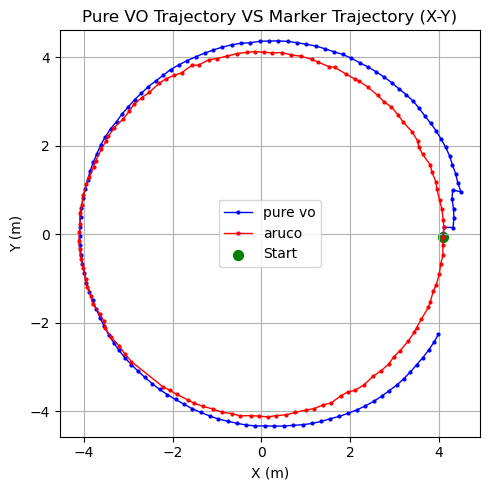

In [15]:
import pandas as pd

vo_poses = pd.read_csv('utils/pure_vo.csv')
aruco_poses = pd.read_csv('utils/marker_poses.csv')

x_aruco = np.array(aruco_poses['x'])
y_aruco = np.array(aruco_poses['y'])
z_aruco = np.array(aruco_poses['z'])

x_vo = np.array(vo_poses['x'])
y_vo = np.array(vo_poses['y'])
z_vo = np.array(vo_poses['z'])


plt.figure(figsize=(5, 5))
plt.plot(x_vo, y_vo, 'b-o', markersize=2, linewidth=1, label='pure vo')
plt.plot(x_aruco, y_aruco, 'r-o', markersize=2, linewidth=1, label='aruco')
plt.scatter(x_aruco[0], y_aruco[0], c='green', s=50, label="Start")


plt.title("Pure VO Trajectory VS Marker Trajectory (X-Y)")
plt.xlabel("X (m)"); plt.ylabel("Y (m)"); 
plt.axis("equal"); 
plt.grid(True)
plt.legend()
plt.tight_layout(); 
plt.show()


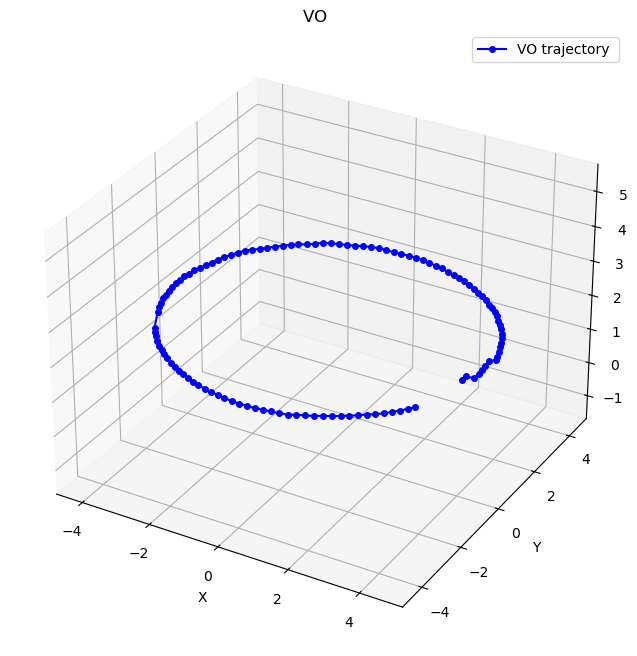

In [24]:
# 3D plot in VO coordinate frame
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_vo, y_vo, z_vo, 'b-o', label='VO trajectory ', markersize=4)


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z ')
ax.set_title('VO ')
ax.axis("equal")
ax.legend()
plt.show()

In [16]:
frame_numbers = np.array(aruco_poses['frame']) - 1

x_vo = x_vo[frame_numbers]
y_vo = y_vo[frame_numbers]
z_vo = z_vo[frame_numbers]


In [17]:
error_x = abs(x_aruco - x_vo)
error_y = abs(y_aruco - y_vo)
error_z = abs(z_aruco - z_vo)

error_data = {
    "frame": frame_numbers,
    "x": error_x,
    "y": error_y, 
    "z": error_z, 
}

error = pd.DataFrame(error_data)


# max_error_x = max(error_x)
# print(max_error_x)

# index_of_x_error = np.where(error == max_error_x)
# print(f"The frame where the max error in x is, is: {index_of_x_error[0]} ")

# max_error_y = max(error_y)
# print(max_error_y)

# max_error_z = max(error_z)
# print(max_error_z)


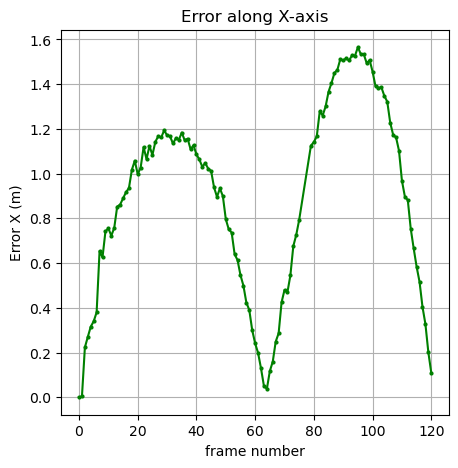

In [18]:
plt.figure(figsize=(5, 5))


plt.plot(frame_numbers, error_x, 'g-o', markersize=2)
plt.title('Error along X-axis')
plt.xlabel('frame number')
plt.ylabel('Error X (m)')
plt.grid(True)



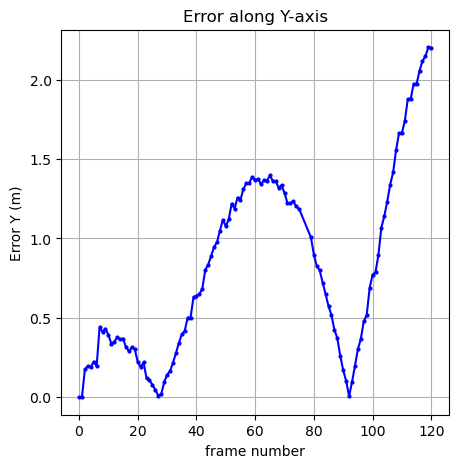

In [19]:

plt.figure(figsize=(5, 5))
plt.plot(frame_numbers, error_y, 'b-o', markersize=2)
plt.title('Error along Y-axis')
plt.ylabel('Error Y (m)')
plt.xlabel('frame number')
plt.grid(True)


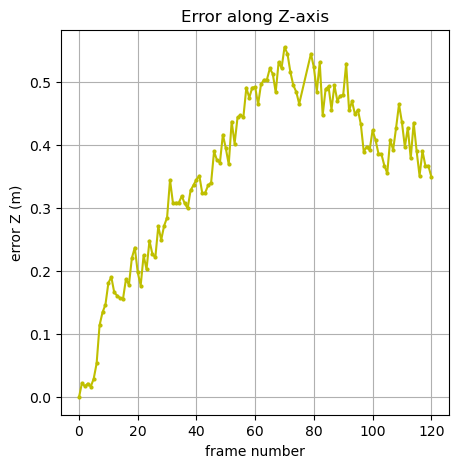

In [20]:
plt.figure(figsize=(5, 5))
plt.plot(frame_numbers, error_z, 'y-o', markersize=2)
plt.title('Error along Z-axis')
plt.ylabel('error Z (m)')
plt.xlabel('frame number')
plt.grid(True)